In [205]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv("kerala.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

The dataset contains the monthly rainfall data from years 1901 to 2018 for the Indian state of Kerala. Kerala is one of the few states which are usually badly hit by monsoons every year.

It contains the monthly rainfall index of Kerela and also record weather a flood took place that year or not.

In [206]:
# Inspect dataset
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [207]:
# Calculate average rainfall for each month over the years
monthly_avg = df.loc[:, 'JAN':'DEC'].mean()

monthly_avg

JAN     12.218644
FEB     15.633898
MAR     36.670339
APR    110.330508
MAY    228.644915
JUN    651.617797
JUL    698.220339
AUG    430.369492
SEP    246.207627
OCT    293.207627
NOV    162.311017
DEC     40.009322
dtype: float64

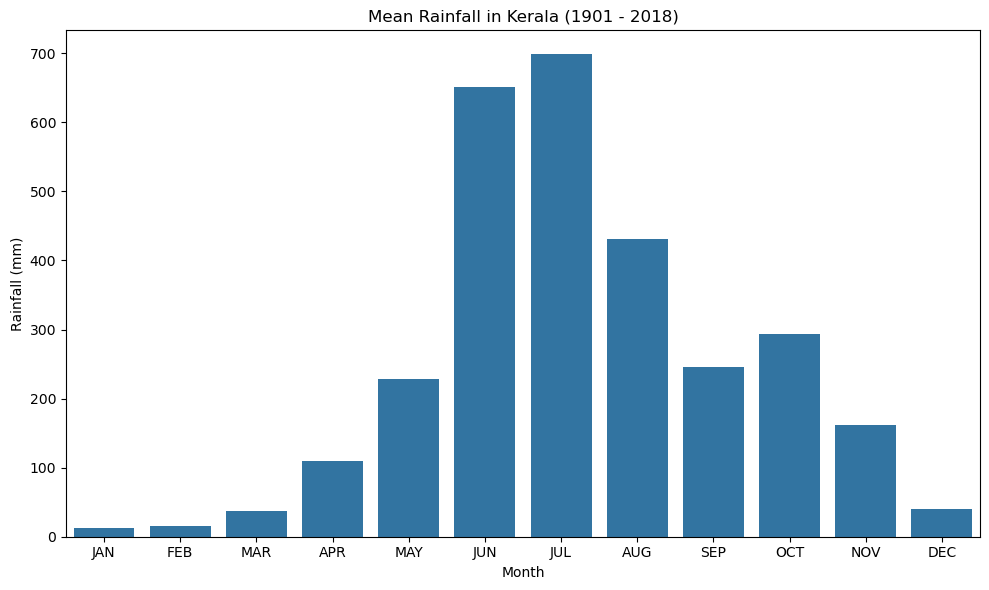

In [208]:
plt.figure(figsize=(10, 6), tight_layout=True)
plt.title('Mean Rainfall in Kerala (1901 - 2018)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')

sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.show()

In [209]:
# Keep only the relevant columns pertaining to high rainfall months and drop the rest
df.drop(['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL'], axis=1, inplace=True)
df

,YEAR,JUN,JUL,AUG,FLOODS
0,1901,824.6,743.0,357.5,YES
1,1902,390.9,1205.0,315.8,YES
2,1903,558.6,1022.5,420.2,YES
3,1904,1098.2,725.5,351.8,YES
4,1905,850.2,520.5,293.6,NO
...,...,...,...,...,...
113,2014,454.4,677.8,733.9,YES
114,2015,563.6,406.0,252.2,NO
115,2016,522.2,412.3,325.5,NO
116,2017,498.5,319.6,531.8,NO


In [210]:
# How much rainfall index is considered as a heavy ranifall?
med_jun, med_jul, med_aug = df[['JUN', 'JUL', 'AUG']].median()

med_jun, med_jul, med_aug

(625.5999999999999, 691.65, 386.25)

In [211]:
# Convert columns to binary based on threshold values
df['JUN'] = (df['JUN'] > med_jun)*1
df['JUL'] = (df['JUL'] > med_jul)*1
df['AUG'] = (df['AUG'] > med_aug)*1

df

,YEAR,JUN,JUL,AUG,FLOODS
0,1901,1,1,0,YES
1,1902,0,1,0,YES
2,1903,0,1,1,YES
3,1904,1,1,0,YES
4,1905,1,0,0,NO
...,...,...,...,...,...
113,2014,0,0,1,YES
114,2015,0,0,0,NO
115,2016,0,0,0,NO
116,2017,0,0,1,NO


## Calculate the probability of flood given that rainfall in June is greater than the median June rainfall.

![\Large P(FLOODS=YES|JUN=1)](https://latex.codecogs.com/svg.latex?\Large&space;P(FLOODS=YES|JUN=1))

![\Large =\frac{P(FLOODS=YES \cap JUN=1)}{P(JUN=1)}](https://latex.codecogs.com/svg.latex?\Large=&space;\frac{P(FLOODS=YES&space;\cap&space;JUN=1)}{P(JUN=1)})


In [212]:
# Function to generate crosstab for a given month
ct = lambda col:pd.crosstab(df['FLOODS'], df[col], margins=True)

ct('JUN')

JUN,0,1,All
FLOODS,,,
NO,42,16,58
YES,17,43,60
All,59,59,118


![\Large P(FLOODS=YES \bigcap JUN=1)](https://latex.codecogs.com/svg.latex?\Large&space;P(FLOODS=YES&space;\cap&space;JUN=1))

In [213]:
print(f"{ct('JUN').loc['YES', 1]}/{ct('JUN').loc['All', 'All']}")

43/118


![\Large P(JUN=1)](https://latex.codecogs.com/svg.latex?\Large&space;P(JUN=1))

In [214]:
print(f"{ct('JUN').loc['All', 1]}/{ct('JUN').loc['All', 'All']}")

59/118


![\Large P(FLOODS=YES|JUN=1)](https://latex.codecogs.com/svg.latex?\Large&space;P(FLOODS=YES|JUN=1))

In [215]:
ct('JUN').loc['YES', 1] / ct('JUN').loc['All', 1]

0.7288135593220338

**Conclusion:** There is a **73% chance of floods in June** when rainfall crosses the median threshold value.

## Similarly, calculate the probability of floods in July and August when rainfall is greater than the median rainfall in those months.

![\Large P(FLOODS=YES|JUL=1)](https://latex.codecogs.com/svg.latex?\Large&space;P(FLOODS=YES|JUL=1))

In [216]:
ct('JUL').loc['YES', 1] / ct('JUL').loc['All', 1]

0.6610169491525424

**Conclusion:** There is a **66% chance of floods in July** when rainfall crosses the median threshold value.

![\Large P(FLOODS=YES|AUG=1)](https://latex.codecogs.com/svg.latex?\Large&space;P(FLOODS=YES|AUG=1))

In [217]:
ct('AUG').loc['YES', 1] / ct('AUG').loc['All', 1]

0.6271186440677966

**Conclusion:** There is a **63% chance of floods in August** when rainfall crosses the median threshold value.